In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
def unique(list1): 
    x = np.array(list1) 
    return np.unique(x)

In [4]:
PATH='C:/Users/houy2/Documents/Yuan/projects/AD/AD_genetics/AD_MR'
input_data='data'
output_data='data'
GWAS_group="EUR" # to use EAs as a example. 
os.chdir(PATH)

  symbol Group  Amyloid  Tau  Inflammation  Neuromodulation Microglia  \
0  EPHX2   EAs  amyloid  NaN  inflammation  Neuromodulation       NaN   
1  PRKCB   EAs      NaN  NaN           NaN  Neuromodulation       NaN   
2  FOLH1   EAs  amyloid  NaN  inflammation  Neuromodulation       NaN   
3  BACE2   EAs  amyloid  NaN           NaN              NaN       NaN   
4   EGFR   EAs  amyloid  NaN           NaN  Neuromodulation       NaN   

   Metabolism  Vasculature Other  \
0  Metabolism  Vasculature   NaN   
1         NaN          NaN   NaN   
2  Metabolism          NaN   NaN   
3         NaN          NaN   NaN   
4         NaN          NaN   NaN   

                                                PMID  
0                         33298560|26976569|23701967  
1                                  24334724|26510741  
2  35732693|20624932|23525278|33256444|16190866|3...  
3                30982098|31270419|30626751|35110536  
4       23019586|16467848|35142667|16467848|16837601  
[['Neuromodula

<Figure size 1500x600 with 0 Axes>

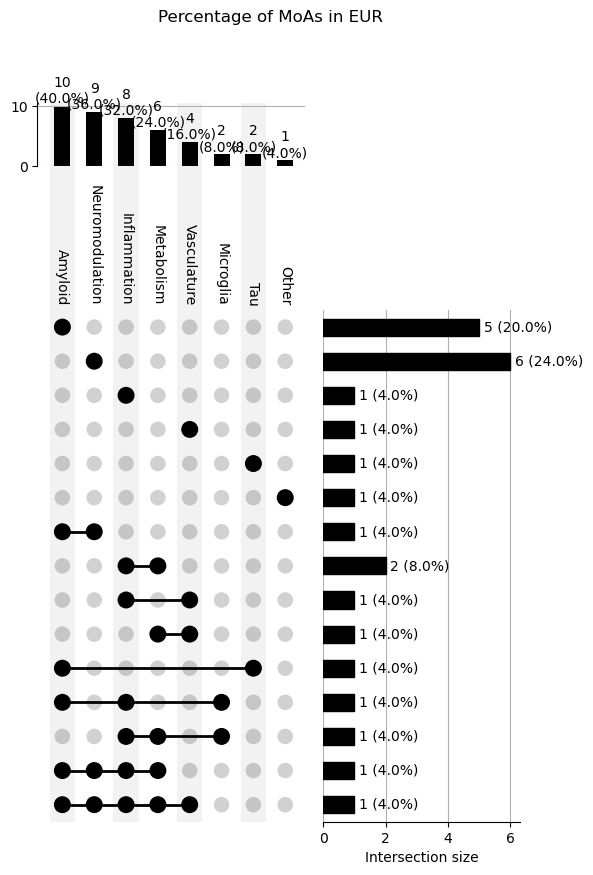

In [5]:
from upsetplot import from_memberships
from upsetplot import plot
from matplotlib import pyplot as plt

df = pd.read_csv("./%s/%s_MoA.tsv" % (input_data,GWAS_group),sep="\t")
print(df.head())
df_new=pd.DataFrame()
pathology_list=["Amyloid","Tau","Inflammation","Neuromodulation","Microglia","Metabolism","Vasculature","Other"]
for i in pathology_list:
    sub=df[['symbol',i]].rename(columns={i:"type"}).dropna()
    sub["group"]=i
    df_new=pd.concat([df_new,sub])
target_list=unique(df_new['symbol'].tolist())
t_list=[]
for t in target_list:
    sub_t=df_new[df_new["symbol"]==t].copy()
    t_list.append(sub_t["group"].tolist())
print(t_list)
pathology = from_memberships(t_list)
fig=plt.figure(figsize=(15,6))
plot(pathology, subset_size='count',orientation='vertical',show_counts='%d', show_percentages=True)
plt.suptitle('Percentage of MoAs in %s' % GWAS_group)
plt.show()
#plt.savefig("./%s/UpSet-MoA_%s.pdf" % (input_data,GWAS_group))